In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import openturns as ot
import copulogram as cp
from matplotlib import cm, colormaps
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from itertools import product

In [3]:
from matplotlib import rc
rc('font', **{'family': 'Libertine'})
rc('text', usetex=True)
rc('font', size=16)# Set the default text font size
rc('axes', titlesize=20)# Set the axes title font size
rc('axes', labelsize=16)# Set the axes labels font size
rc('xtick', labelsize=16)# Set the font size for x tick labels
rc('ytick', labelsize=16)# Set the font size for y tick labels
rc('legend', fontsize=16)# Set the legend font size

## Ishigami function example

In [4]:
g = ot.SymbolicFunction(['X1','X2','X3'], ['sin(X1) + 7. * sin(X2)^2 + 0.1 * X3^4 * sin(X1)'])
X = ot.Normal(3)

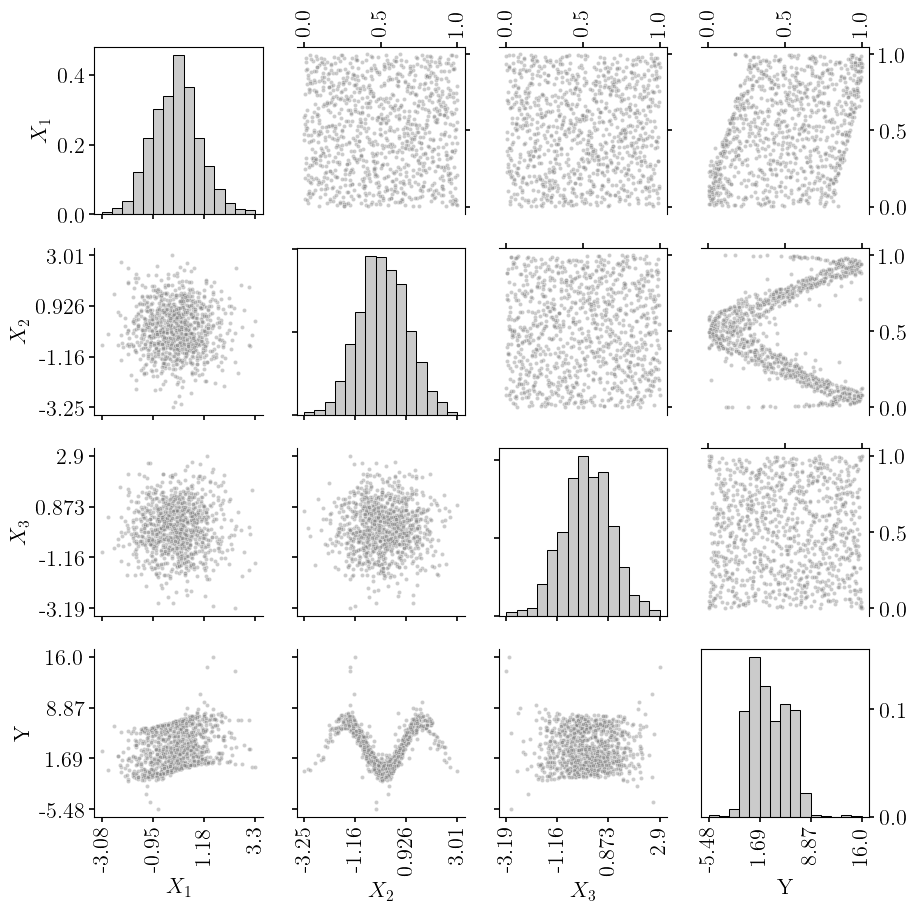

In [5]:
size = 1000
xsample = X.getSample(size)
ysample=g(xsample)
#
data = pd.DataFrame(np.array(xsample[:size]), columns=['$X_1$', '$X_2$', '$X_3$'])
data['Y'] = np.array(ysample[:size])
copulogram = cp.Copulogram(data)
copulogram.draw(color='C7', marker='.', alpha=0.4);
plt.savefig(f"figures/ishigami_copluogram.png", dpi=300, bbox_inches='tight', pad_inches=0.4);

## Iris flower dataset

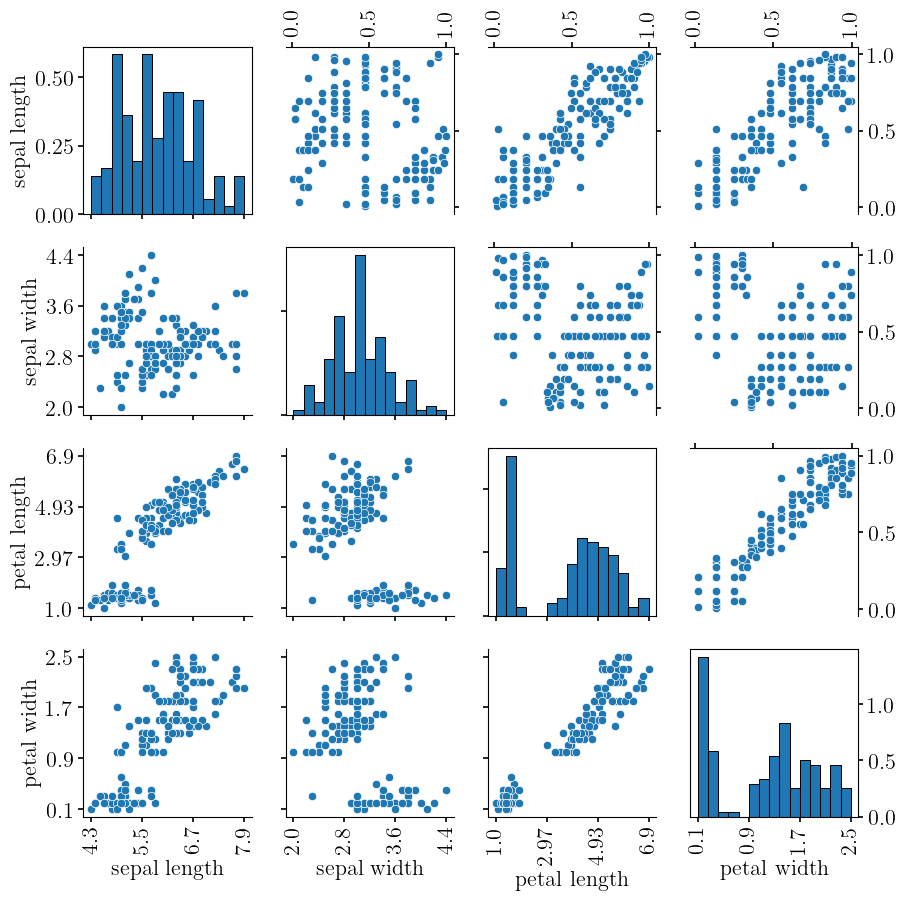

In [6]:
data = sns.load_dataset('iris')
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'species']
copulogram = cp.Copulogram(data)
copulogram.draw();

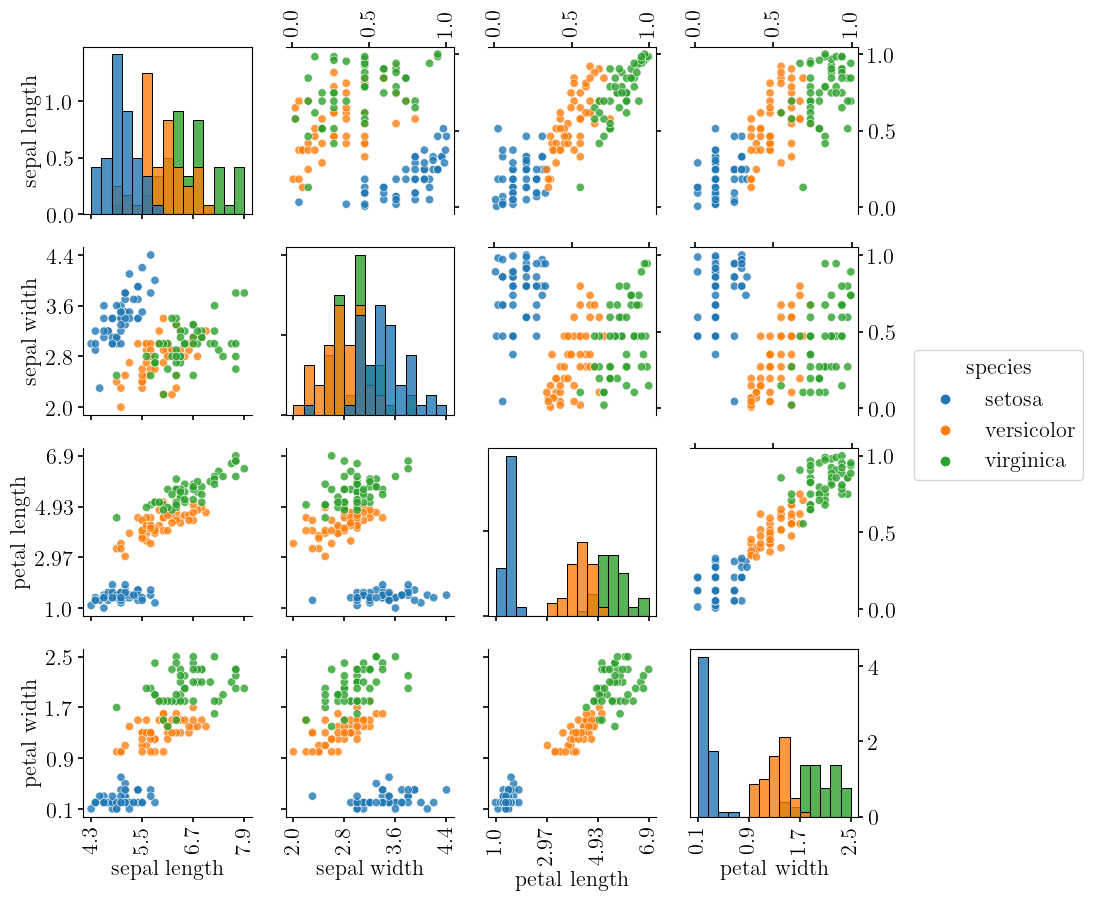

In [7]:
copulogram.draw(alpha=0.8, hue='species', kde_on_marginals=False)
plt.savefig(f"figures/iris_copulogram.png", dpi=300, bbox_inches='tight', pad_inches=0.4);

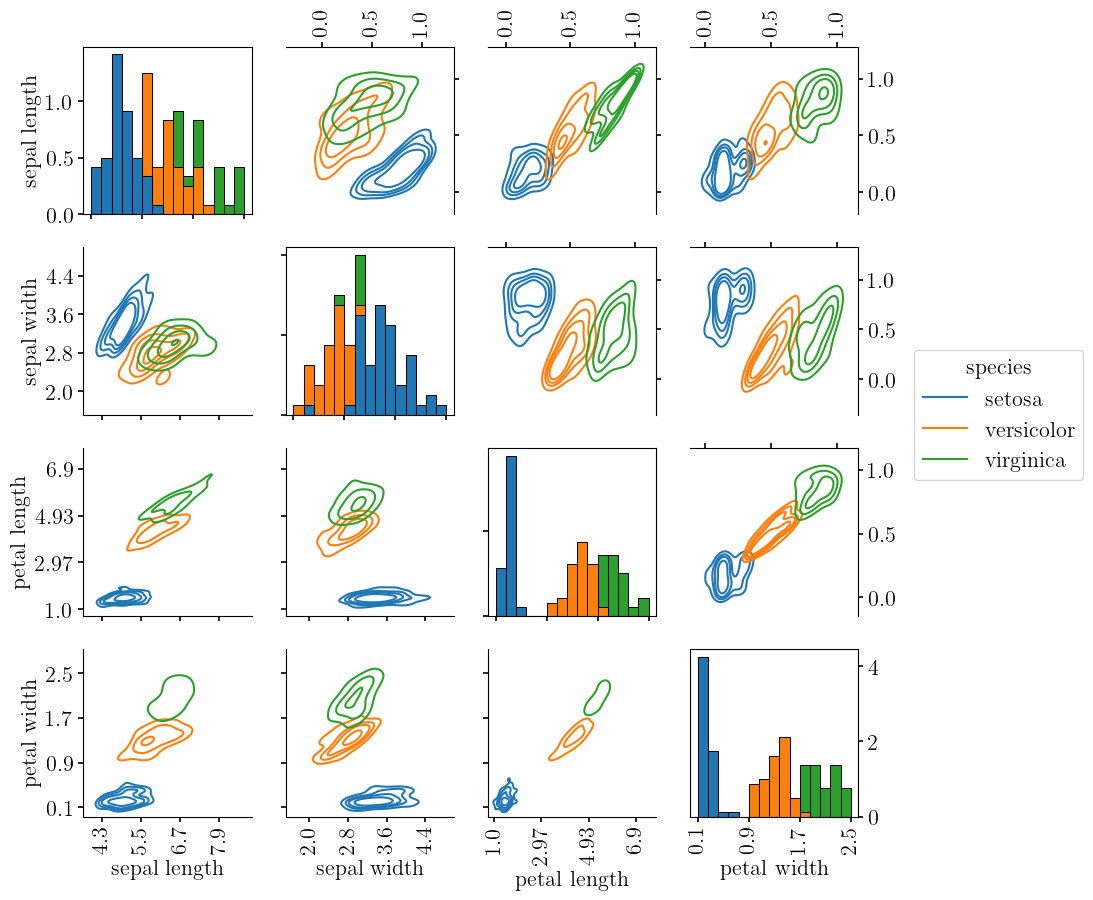

In [8]:
copulogram.draw(hue='species', quantile_contour_levels=[0.2, 0.4, 0.6, 0.8]);